In [21]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [22]:
data=pd.read_csv("train.csv")

In [23]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape


In [24]:
Y_train

array([6, 8, 7, ..., 9, 1, 2])

In [25]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [26]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


In [27]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)


Iteration:  0
[5 1 4 ... 1 4 6] [6 8 7 ... 9 1 2]
0.10417073170731707
Iteration:  10
[9 2 0 ... 2 4 6] [6 8 7 ... 9 1 2]
0.24660975609756097
Iteration:  20
[9 2 0 ... 2 1 6] [6 8 7 ... 9 1 2]
0.3277317073170732
Iteration:  30
[9 2 7 ... 2 1 6] [6 8 7 ... 9 1 2]
0.3929756097560976
Iteration:  40
[9 9 7 ... 2 1 6] [6 8 7 ... 9 1 2]
0.43746341463414634
Iteration:  50
[6 9 7 ... 4 1 6] [6 8 7 ... 9 1 2]
0.4810731707317073
Iteration:  60
[6 9 7 ... 4 1 6] [6 8 7 ... 9 1 2]
0.5251219512195122
Iteration:  70
[6 9 7 ... 4 1 6] [6 8 7 ... 9 1 2]
0.5637317073170731
Iteration:  80
[6 9 7 ... 4 1 6] [6 8 7 ... 9 1 2]
0.594609756097561
Iteration:  90
[6 9 7 ... 4 1 6] [6 8 7 ... 9 1 2]
0.622
Iteration:  100
[6 9 7 ... 4 1 6] [6 8 7 ... 9 1 2]
0.6442682926829268
Iteration:  110
[6 9 7 ... 4 1 6] [6 8 7 ... 9 1 2]
0.6632926829268293
Iteration:  120
[6 9 7 ... 4 1 6] [6 8 7 ... 9 1 2]
0.680609756097561
Iteration:  130
[6 9 7 ... 4 1 6] [6 8 7 ... 9 1 2]
0.6959512195121951
Iteration:  140
[6 9 7 ... 4 

In [39]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    print(current_image.shape)
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

def test_prediction2(arr, W1, b1, W2, b2):
    prediction = make_predictions(arr, W1, b1, W2, b2)
    print("Prediction: ", prediction)

(784, 1)
Prediction:  [4]
Label:  4


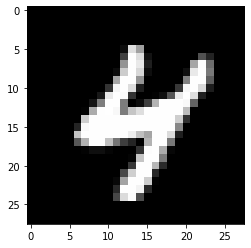

In [40]:
test_prediction(101, W1, b1, W2, b2)

In [19]:
# dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
# get_accuracy(dev_predictions, Y_dev)


In [55]:
vid = cv2.VideoCapture(0)

In [56]:
while(True):
    ret , frame = vid.read()
    cv2.imshow('frame', frame)
    k = cv2.waitKey(1) 
    if k == ord('q'):
        break
    if k == ord('s'):
        cv2.imwrite('burst1.png',frame)
        print("soham")
        break
vid.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

soham


-1

In [57]:
img = cv2.imread('burst1.png',0)
print(img.shape)
while True:    
    cv2.imshow("image", img)
    if cv2.waitKey(1) == 27:
        break
cv2.destroyAllWindows()
cv2.waitKey(1)

(720, 1280)


-1

In [58]:
bigger = cv2.resize(img,(28,28))

In [59]:
while True:    
    cv2.imshow("image", bigger)
    if cv2.waitKey(1) == 27:
        break
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [60]:
arr = bigger/255    

In [61]:
for i in range(len(arr)):
    for j in range(len(arr[0])):
        if arr[i][j]<0.5:
            arr[i][j]=1.00
        else:
            arr[i][j]=0.00
print(arr)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0

In [62]:
while True:    
    cv2.imshow("image", arr)
    if cv2.waitKey(1) == 27:
        break
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [63]:
one_D_arr = np.reshape(arr,(784,1))

In [65]:
test_prediction2(one_D_arr, W1, b1, W2, b2)

Prediction:  [7]
